In [70]:
import scipy.stats as scs
import pandas as pd
import pylab
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [71]:
data1 = pd.read_csv('amazon.csv', encoding='latin1', delimiter=",")
data1["month"].replace({"Janeiro": "January", "Fevereiro": "February", "Março": "March", "Abril": "April", "Maio": "May", "Junho": "June", "Julho": "July", "Agosto": "August", "Setembro": "September", "Outubro": "October", "Novembro": "November", "Dezembro": "December",}, inplace=True)
print(data1)

      year      state     month  number        date
0     1998       Acre   January     0.0  1998-01-01
1     1999       Acre   January     0.0  1999-01-01
2     2000       Acre   January     0.0  2000-01-01
3     2001       Acre   January     0.0  2001-01-01
4     2002       Acre   January     0.0  2002-01-01
...    ...        ...       ...     ...         ...
6449  2012  Tocantins  December   128.0  2012-01-01
6450  2013  Tocantins  December    85.0  2013-01-01
6451  2014  Tocantins  December   223.0  2014-01-01
6452  2015  Tocantins  December   373.0  2015-01-01
6453  2016  Tocantins  December   119.0  2016-01-01

[6454 rows x 5 columns]


In [72]:
#3. Skrypt opisujący strukturę danych – statystyka opisowa
#a. Dla wybranych danych podstawowe elementy statystyki opisowej 

d = data1.describe()
print(d)

              year       number
count  6454.000000  6454.000000
mean   2007.461729   108.293163
std       5.746654   190.812242
min    1998.000000     0.000000
25%    2002.000000     3.000000
50%    2007.000000    24.000000
75%    2012.000000   113.000000
max    2017.000000   998.000000


month
April        28188.770
August       88050.435
December     57535.480
February     30848.050
January      47747.844
July         92326.113
June         56010.675
March        30717.405
May          34731.363
November     85508.054
October      88681.579
September    58578.305
Name: number, dtype: float64

3.672326735453183 0.1594279205419682
Rozkład wygląda na normalny



D:\Program Files\Anaconda\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


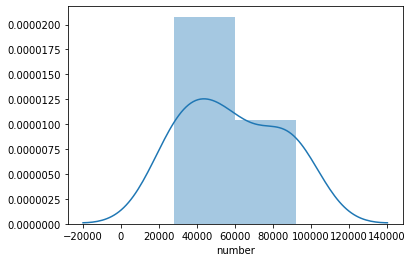

Odchylenie standardowe: 23804.712590268784


In [73]:
#4. Skrypty testujące hipotezy
#a. Badanie normalności rozkładu, analiza równości wariancji

data4 = data1.groupby('month')['number'].sum()
print(data4)
print()
from scipy.stats import normaltest
stats, p = normaltest(data4)
print(stats, p)
if p > 0.05:
    print ("Rozkład wygląda na normalny")

print()
data5 = data4  
sns.distplot(data5)
plt.show()
#data1.plot(kind="scatter", x="month",y="number",figsize=(10,10),color="black")

data6 = np.std(data5)
print("Odchylenie standardowe:", data6)
#print(stat.stdev(data6))
#print(stat.variance(data6))

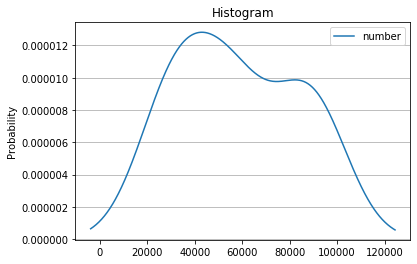

In [91]:
#b. Testy dla zmiennych zależnych, niezależnych

#dla niezależnych:
#stats.f_oneway(data1, data2)
#zależnych:
#stats.wilcoxon(data1, data2)


#c. Testy dla wielu średnich (analiza wariancji)

fig, ax = plt.subplots()
data4.plot.kde(ax=ax, legend=True, title='Histogram')
ax.set_ylabel('Probability')
ax.grid(axis='y')


-5361.933881041733
[2.72529973]
Linear Regression R squared: -0.0027


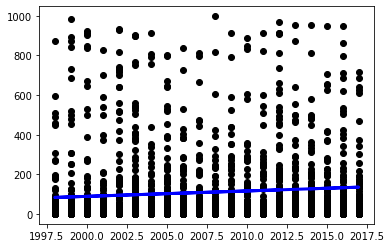

In [85]:
#5. Skrypty wykorzystujące regresję do prognozowania przyszłych wartości
#a. Różne rodzaje regresji – do przewidywania przyszłych wartości

X = data1['year'].values.reshape(-1,1)
y = data1['number']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print(regressor.intercept_)
print(regressor.coef_)

print('Linear Regression R squared: %.4f' % regressor.score(X_test, y_test))

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)